In [43]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# read train data
train_df=pd.read_parquet("train.parquet")

 # ***Drop-off rate Analysis***

In [45]:
# taking users who are all taking target drug
target_df = train_df[train_df['Incident'] == 'TARGET DRUG']
target_df

,Patient-Uid,Date,Incident
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG
...,...,...,...
29074998,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG
29075105,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG
29075494,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG
29080031,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG


In [46]:
# Temporarily suppress the SettingWithCopyWarning
with pd.option_context('mode.chained_assignment', None):
    target_df['Date'] = target_df['Date'].apply(pd.to_datetime)
    target_df['Month'] = target_df['Date'].apply(lambda x: x.month)

# The warning is suppressed within this block

target_df

,Patient-Uid,Date,Incident,Month
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG,4
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG,6
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG,6
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG,11
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG,3
...,...,...,...,...
29074998,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG,10
29075105,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG,7
29075494,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG,5
29080031,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG,6


In [47]:
# Calculate the drop-off rate over different months
dropoff_rate_df = target_df.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)
dropoff_rate_df

Month
1        0.0
2     -201.0
3      294.0
4      467.0
5      392.0
6       53.0
7      284.0
8     -121.0
9    -1593.0
10     262.0
11    -129.0
12      72.0
Name: Patient-Uid, dtype: float64

In [48]:
# Temporarily suppress the SettingWithCopyWarning
with pd.option_context('mode.chained_assignment', None):
  # Convert 'Date' to datetime
  target_df['Date'] = pd.to_datetime(target_df['Date'])

  # Extract the month and year from 'Date'
  target_df['Month'] = target_df['Date'].dt.month
  target_df['Year'] = target_df['Date'].dt.year

# Group by 'Month' and 'Year', count unique IDs in each group, and reset the index
monthly_counts = target_df.groupby(['Year', 'Month'])['Patient-Uid'].nunique().reset_index()

# Sort by year and month
monthly_counts = monthly_counts.sort_values(['Year', 'Month'])

# Calculate the difference between consecutive months
monthly_counts['Monthly_Difference'] = monthly_counts['Patient-Uid'].diff().fillna(0)

# Display the result
print(monthly_counts)


    Year  Month  Patient-Uid  Monthly_Difference
0   2017      2            1                 0.0
1   2017      3            2                 1.0
2   2017      4            1                -1.0
3   2017      5            5                 4.0
4   2017      6           11                 6.0
5   2017      7            6                -5.0
6   2017      8           10                 4.0
7   2017      9            6                -4.0
8   2017     10            6                 0.0
9   2017     11            6                 0.0
10  2017     12           14                 8.0
11  2018      1           15                 1.0
12  2018      2           19                 4.0
13  2018      3          472               453.0
14  2018      4          732               260.0
15  2018      5         1042               310.0
16  2018      6         1217               175.0
17  2018      7         1244                27.0
18  2018      8         1522               278.0
19  2018      9     

In [49]:
# Reorder the index of dropoff_rate_df to match the calendar order
custom_month_order = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

monthly_counts['Month'] = monthly_counts['Month'].apply(lambda x: custom_month_order[x])

# Display the drop-off rate
monthly_counts

,Year,Month,Patient-Uid,Monthly_Difference
0,2017,February,1,0.0
1,2017,March,2,1.0
2,2017,April,1,-1.0
3,2017,May,5,4.0
4,2017,June,11,6.0
5,2017,July,6,-5.0
6,2017,August,10,4.0
7,2017,September,6,-4.0
8,2017,October,6,0.0
9,2017,November,6,0.0


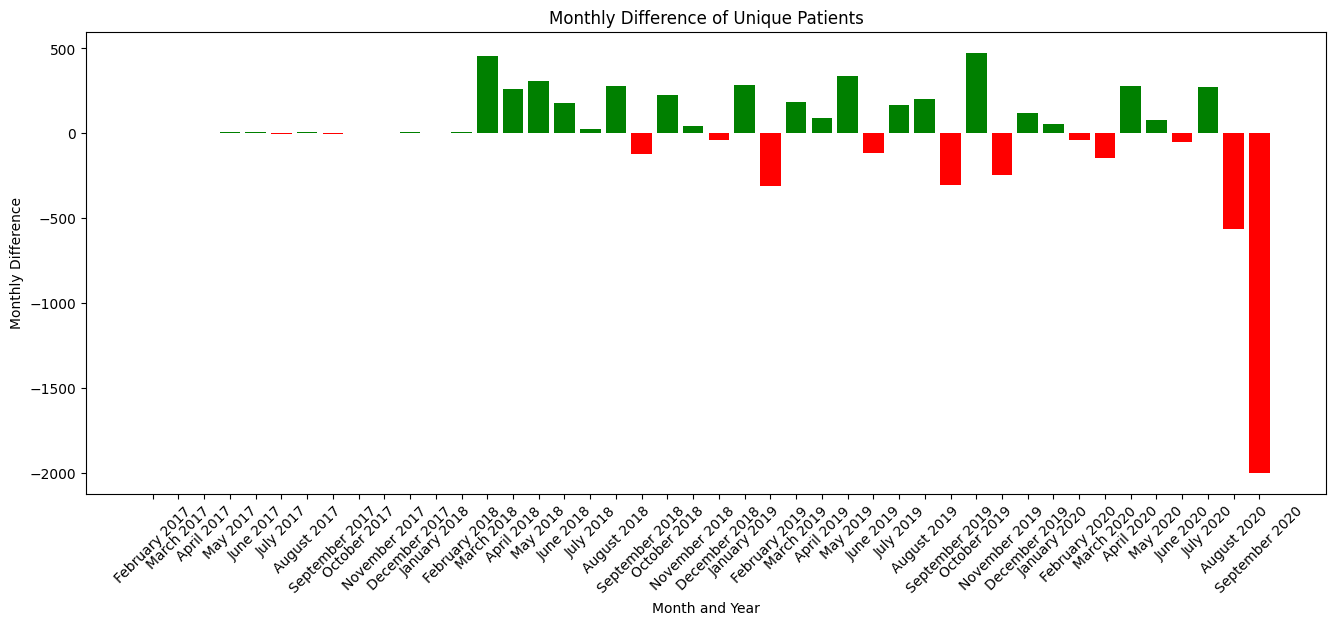

In [54]:
# Create a figure and set the figure size
plt.figure(figsize=(16, 6))

# Determine colors based on positive and negative values
colors = np.where(monthly_counts['Monthly_Difference'] >= 0, 'green', 'red')

# Plot the bar graph with months and years on the x-axis and monthly difference on the y-axis
plt.bar(monthly_counts.index, monthly_counts['Monthly_Difference'], color=colors)

# Set the x-axis labels as a combination of months and years
x_labels = [f"{month} {year}" for year, month in zip(monthly_counts['Year'], monthly_counts['Month'])]
plt.xticks(monthly_counts.index, x_labels, rotation=45)

# Set the title and labels
plt.title('Monthly Difference of Unique Patients')
plt.xlabel('Month and Year')
plt.ylabel('Monthly Difference')

# Show the plot
plt.show()


**In August 2020, there was a significant increase in drop-offs, with nearly 1800 patients discontinuing their treatment. This is the highest number of drop-offs observed since February 2017.**

# ***Analysis on events driving a patient to stop taking “Target Drug”***

In [51]:
# Select patients from the training data who dropped off before the target drug
dropped_off_patients = train_df[train_df['Patient-Uid'].isin(target_df['Patient-Uid'])]
dropped_off_patients = dropped_off_patients[dropped_off_patients['Date'] < dropped_off_patients.groupby('Patient-Uid')['Date'].transform('max')]

# Filter out rows where the incident is 'TARGET DRUG'
dropoff_reasons = dropped_off_patients[dropped_off_patients['Incident'] != 'TARGET DRUG']

# Display the resulting DataFrame containing drop-off reasons
dropoff_reasons

,Patient-Uid,Date,Incident
8,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2018-02-22,SYMPTOM_TYPE_6
22,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-02-21,SYMPTOM_TYPE_6
23,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2017-05-11,SYMPTOM_TYPE_10
29,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2019-11-22,PRIMARY_DIAGNOSIS
32,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2020-01-28,PRIMARY_DIAGNOSIS
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [52]:
# Calculate the frequency of each event leading to drop-off and take the logarithm
incident_frequency = np.log1p(dropoff_reasons['Incident'].value_counts())

# Display the resulting incident frequency
incident_frequency


# Display the resulting incident frequency
incident_frequency

PRIMARY_DIAGNOSIS    12.377738
DRUG_TYPE_6          12.212884
DRUG_TYPE_1          11.988563
DRUG_TYPE_2          11.895197
DRUG_TYPE_7          11.668390
DRUG_TYPE_0          11.625477
DRUG_TYPE_3          11.194729
DRUG_TYPE_8          10.675677
TEST_TYPE_1          10.651289
DRUG_TYPE_9          10.555396
DRUG_TYPE_11         10.151441
SYMPTOM_TYPE_0       10.105448
DRUG_TYPE_5           9.628853
SYMPTOM_TYPE_6        9.582456
TEST_TYPE_0           9.444859
DRUG_TYPE_10          9.421411
SYMPTOM_TYPE_7        9.220192
DRUG_TYPE_14          9.200492
DRUG_TYPE_13          8.755422
TEST_TYPE_3           8.586719
DRUG_TYPE_12          8.508959
SYMPTOM_TYPE_1        8.414496
TEST_TYPE_2           8.342840
SYMPTOM_TYPE_2        8.265650
SYMPTOM_TYPE_5        8.189522
SYMPTOM_TYPE_15       8.165079
SYMPTOM_TYPE_14       8.102586
SYMPTOM_TYPE_8        7.967973
DRUG_TYPE_15          7.936660
SYMPTOM_TYPE_10       7.748460
SYMPTOM_TYPE_9        7.689829
SYMPTOM_TYPE_16       7.632401
SYMPTOM_

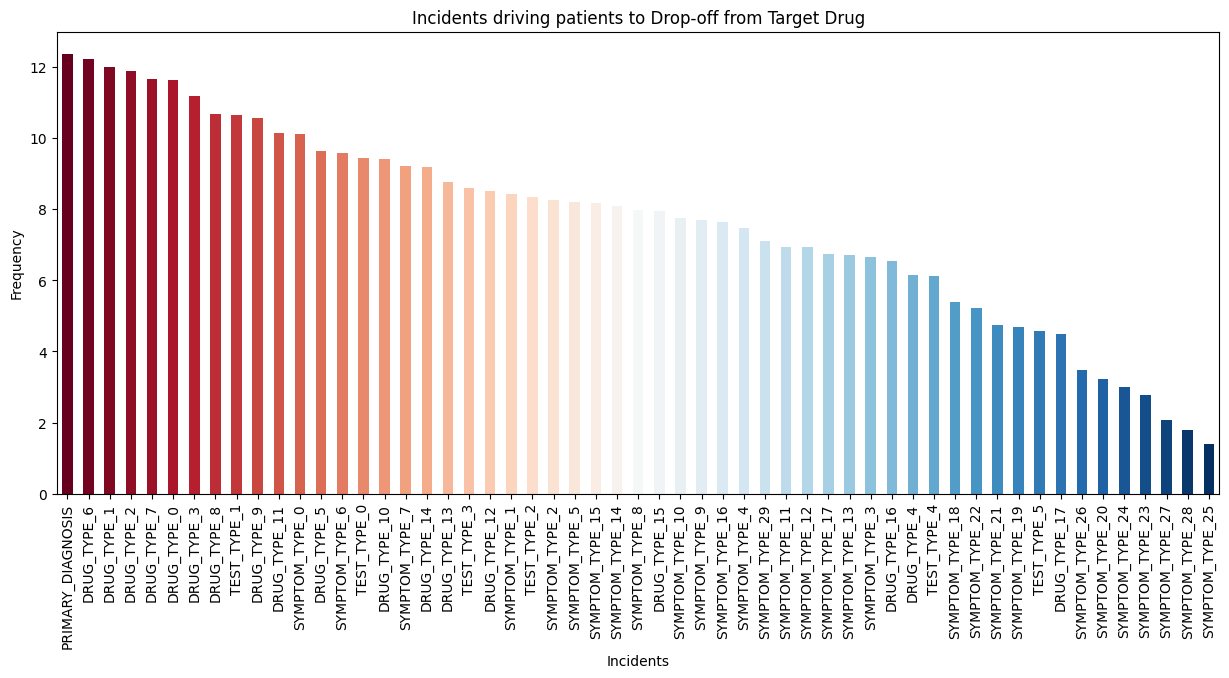

In [53]:
# Plot the events leading to drop-off with a color gradient
plt.figure(figsize=(15, 6))

# Create a color gradient from red to blue using the RdBu colormap
colors = plt.cm.RdBu(np.linspace(0, 1, len(incident_frequency)))  # Red to blue gradient

# Create a bar chart with colors based on the gradient
incident_frequency.plot(kind='bar', color=colors)

# Add labels and title to the plot
plt.xlabel('Incidents')
plt.ylabel('Frequency')
plt.title('Incidents driving patients to Drop-off from Target Drug')

# Display the plot
plt.show()

**Based on the analysis, it appears that a significant number of patients drop off after receiving their primary diagnosis. And the least number of patients drop-off after taking Drug Type 17.**